# Step 1: Import Necessary Liberaries

In [244]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive visualization
import plotly.express as px

# SimpleImputer for imputiong missing values
from sklearn.impute import SimpleImputer

# Iterative Imputer for imputing missing values using ML models
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For encoding
from sklearn.preprocessing import LabelEncoder

# For scaling
from sklearn.preprocessing import StandardScaler

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Pipeline
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Evaluation metrics for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluation metrics for regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the Dataset

In [245]:
df_train = pd.read_csv(r'C:\Users\Admin\Desktop\PYTHON-For-Data-Science_and_AI\00_projects\04_titanic_eda_and_model_for_prediction\data/train.csv')
df_test = pd.read_csv(r'C:\Users\Admin\Desktop\PYTHON-For-Data-Science_and_AI\00_projects\04_titanic_eda_and_model_for_prediction\data/test.csv')
submission = pd.read_csv(r'C:\Users\Admin\Desktop\PYTHON-For-Data-Science_and_AI\00_projects\04_titanic_eda_and_model_for_prediction\data/gender_submission.csv')

# Step 3: Basic Information about the Dataset

In [246]:
# Let's see any 5 values of the dataset
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C


In [247]:
print(f"The shape of training dataset is {df_train.shape} in which we have {df_train.shape[0]} rows and {df_train.shape[1]} columns.") 

print('---------------------------------------------------------------------------------------')

print(f"The shape of training dataset is {df_test.shape} in which we have {df_test.shape[0]} rows and {df_test.shape[1]} columns.") 

The shape of training dataset is (891, 12) in which we have 891 rows and 12 columns.
---------------------------------------------------------------------------------------
The shape of training dataset is (418, 11) in which we have 418 rows and 11 columns.


## 3.1 Training Dataste

In [248]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3.1.1 Observations
1. Here we can see the `column` names and their `data types` which are following:
    1. **7 Numerical Columns**
       - **5 Columns of int64 dtype**
          1.  PassengerID
          2.  Survived
          3.  Pclass
          4.  Sibsp
          5.  Parch
       - **2 Columns of float64 dtype**
          1. Age
          2. Fare
    2. **5 Categorical Columns**
       1. Name
       2. Sex
       3. Ticket
       4. Cabin
       5. Embarked
2. We can see the `missing values` in `Age, Cabin and Embarked` Columns.


## 3.2 Testing Dataset

In [249]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### 3.2.1 Observations
1. Here we can see the `column` names and their `data types` which are following:
    1. **7 Numerical Columns**
       - **4 Columns of int64 dtype**
          1.  PassengerID
          2.  Pclass
          3.  Sibsp
          4.  Parch
       - **2 Columns of float64 dtype**
          1. Age
          2. Fare
    2. **5 Categorical Columns**
       1. Name
       2. Sex
       3. Ticket
       4. Cabin
       5. Embarked
2. We can see the `missing values` in `Age, Cabin and Fare` Columns.


# Step 4: Dealing with Missing Values

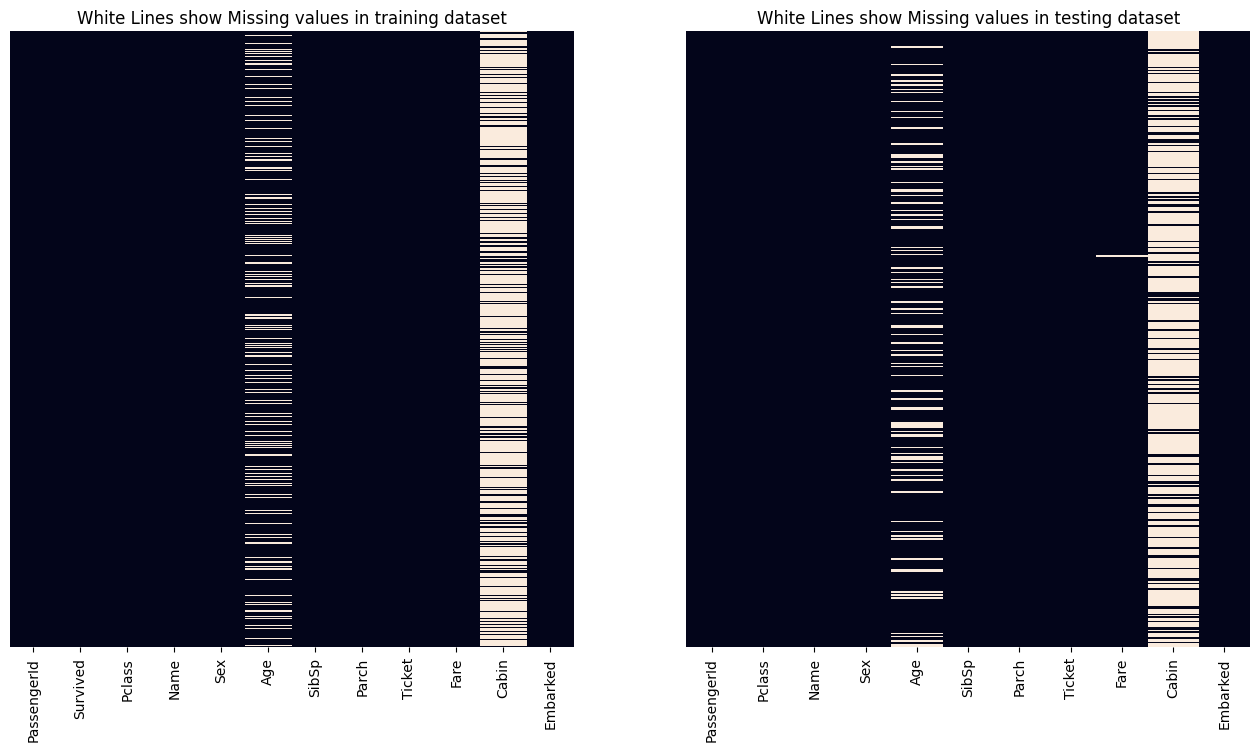

In [250]:
# Let's see the missing values in heatmap
plt.figure(figsize=(16, 8))  

# Display the training dataset heatmap
plt.subplot(1, 2, 1)
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)
plt.title('White Lines show Missing values in training dataset')

# Display the testing dataset heatmap
plt.subplot(1, 2, 2)
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False)
plt.title('White Lines show Missing values in testing dataset')

plt.show()

In [251]:
# Let's see the percentage of missing values in training dataset upto 2 decimal points
missing_values_per = round(df_train.isnull().sum().sort_values(ascending = False) / len(df_train) * 100, 2)
print(missing_values_per)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64


### 4.1.1 Observations
-  Missing values in `Cabin, Age and Embarked` are `77.10%, 19.87% and 0.22%` respectively.

In [252]:
# Let's see the percentage of missing values in testing dataset upto 2 decimal points
missing_values_per = round(df_test.isnull().sum().sort_values(ascending = False) / len(df_test) * 100, 2)
print(missing_values_per)

Cabin          78.23
Age            20.57
Fare            0.24
PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Embarked        0.00
dtype: float64


### 4.1.2 Observations
-  Missing values in `Cabin, Age and Fare` are `78.23%, 20.57% and 0.24%` respectively.

In [253]:
# Let's plot missing values

# Plot the missing values in the training dataset
fig1 = px.bar(x=df_train.columns, y=df_train.isnull().sum() / len(df_train) * 100, 
              title='Missing Values in Training Dataset',
              labels={'x': 'Columns', 'y': 'Percentage of Missing Values'})
fig1.show()

# Plot the missing values in the testing dataset
fig2 = px.bar(x=df_test.columns, y=df_test.isnull().sum() / len(df_train) * 100, 
              title='Missing Values in Testing Dataset',
              labels={'x': 'Columns', 'y': 'Percentage of Missing Values'})
fig2.show()

### 4.1.3 Observations
- We can see that `most missing values` in `Cabin Column`.
- So, let's `drop` that column from our dataset.

## 4.2 Drop the Cabin Column

In [254]:
# Dropping Cabin Column from traing and testing datasets 
df_train.drop('Cabin', axis = 1, inplace = True)
df_test.drop('Cabin', axis = 1, inplace = True)

In [255]:
# Again let's check the missing values in traing dataset
round(df_train.isnull().sum().sort_values(ascending = False) / len(df_train) * 100, 2)

Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

In [256]:
# Again let's check the missing values in testing dataset
round(df_test.isnull().sum().sort_values(ascending = False) / len(df_test) * 100, 2)

Age            20.57
Fare            0.24
PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Embarked        0.00
dtype: float64

## 4.3 Impute Missing Values in Training Dataset

In [257]:
# Impute missing values in training data set
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [258]:
# Let's check again missing values in training dataset
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 4.4 Impute Missing Values in Testing Dataset

In [259]:
# Impute missing values in testing data set
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [260]:
# Let's check again missing values in testing dataset
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 4.5 Observations
- We `successfully imputed` all the missing values from the dataset.

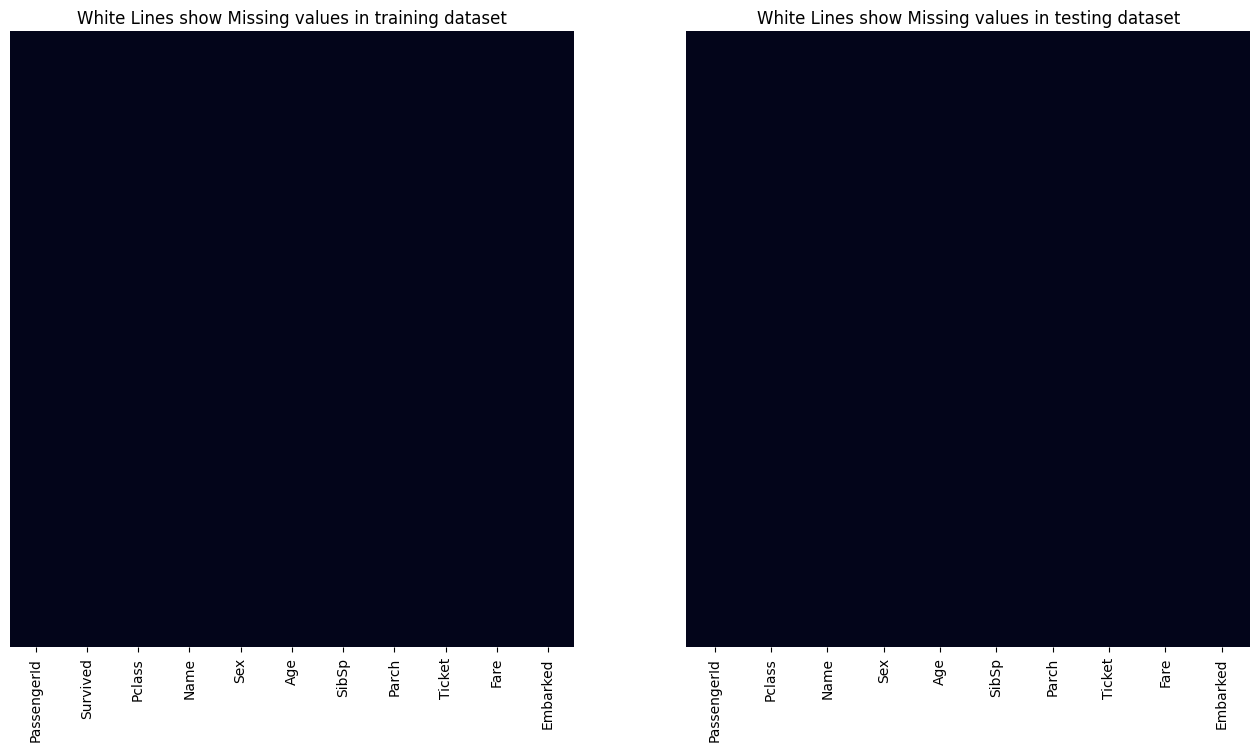

In [261]:
# Let's see the missing values in heatmap again after imputing missing values
plt.figure(figsize=(16, 8))  

# Display the training dataset heatmap
plt.subplot(1, 2, 1)
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)
plt.title('White Lines show Missing values in training dataset')

# Display the testing dataset heatmap
plt.subplot(1, 2, 2)
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False)
plt.title('White Lines show Missing values in testing dataset')

plt.show()

- `No` missing values left.

# Step 5: Check for Duplicates

## 5.1 Duplicates in Training Dataset

In [262]:
df_train.duplicated().sum()

0

### 5.1.1 Observations
- `No duplicates` found in the dataset.

## 5.2 Duplicates in Testing Dataset

In [263]:
df_test.duplicated().sum()

0

### 5.2.1 Observations
- `No duplicates` found in the dataset.

# Step 6: Removing Unnecessary Features

## 6.1 Training Dataset

In [264]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [265]:
df_train.drop(['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

### 6.1.1 Observations
- Remove `PassengerId` Column because it will `not help` in our analysis.
- Since we have `Passengerid` so we can `drop Name Feature` because it will not affect prediction during model building.
- `Ticket Column` is also of `no use` so `drop` that feature also.

In [266]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [267]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [268]:
df_test.drop(['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

### 6.1.1 Observations
- Remove `PassengerId` Column because it will `not help` in our analysis.
- Since we have `Passengerid` so we can `drop Name Feature` because it will not affect prediction during model building.
- `Ticket Column` is also of `no use` so `drop` that feature also.

In [269]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [270]:
print(f"After cleaning the training dataset we left with {df_train.shape[0]} rows and {df_train.shape[1]} columns.")
print('-----------------------------------------------------------------------')
print(f"After cleaning the training dataset we left with {df_test.shape[0]} rows and {df_test.shape[1]} columns.")

After cleaning the training dataset we left with 891 rows and 8 columns.
-----------------------------------------------------------------------
After cleaning the training dataset we left with 418 rows and 7 columns.


# Step 7: Exploratory Data Analysis (EDA)

In [271]:
df_train.sample(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
690,1,1,male,31.0,1,0,57.0,S
874,1,2,female,28.0,1,0,24.0,C
586,0,2,male,47.0,0,0,15.0,S
327,1,2,female,36.0,0,0,13.0,S


## 7.1 Let's explore the `Survived Column`

In [272]:
# Let's see the value counts of survived
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

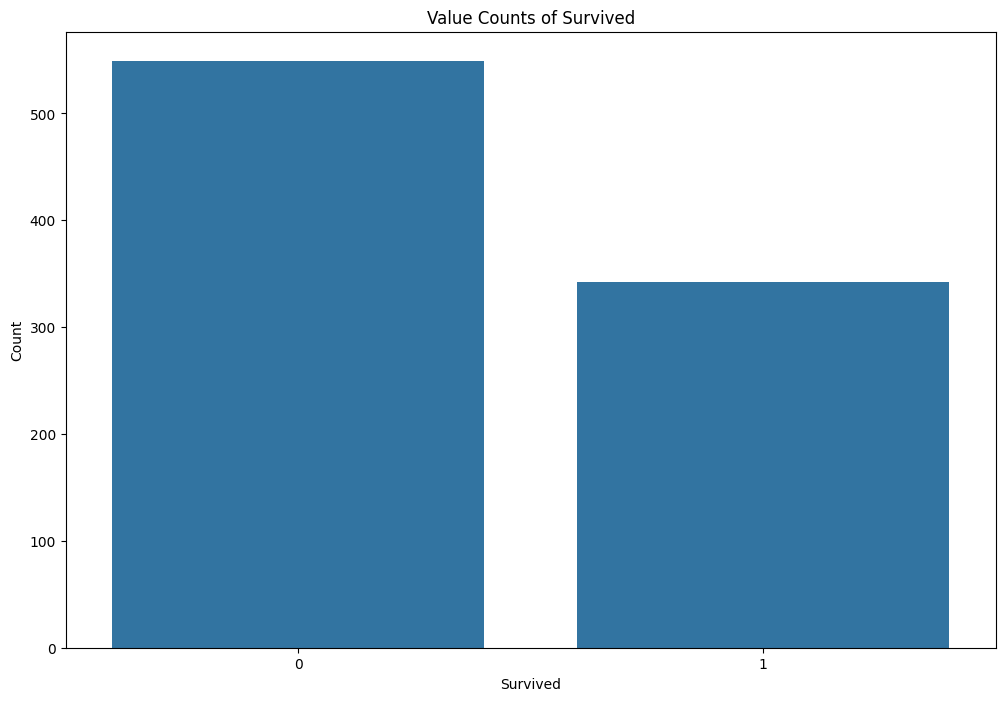

In [273]:
# Let's plot the value counts of the 'Survived' column
plt.figure(figsize=(12, 8))

sns.barplot(x = df_train['Survived'].value_counts().index, y = df_train['Survived'].value_counts())
plt.title('Value Counts of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [274]:

549+342


891

In [275]:
# Let's find out the survival rate upto 2 decimal points
not_survived = 549
survived = 342
total = 891

survival_rate = round((not_survived - survived) / not_survived * 100, 2)
print(survival_rate)

37.7


### 7.1.1 Observations
- From the above graph we can see that most of the people `not survived in titanic accident`.
- The `survival rate was 37.30%` in titanic accident.

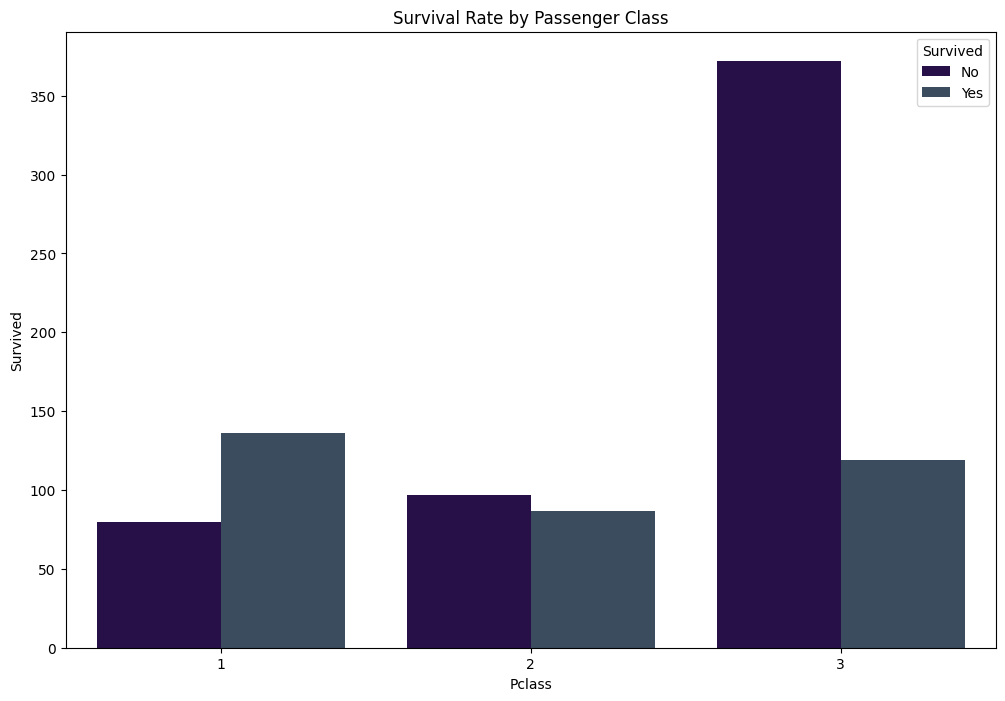

In [276]:
# Let's plot the value counts of the 'Survived' column based on Pclass
plt.figure(figsize=(12, 8))

# Let's define color for each class
color = ['#240750', '#344C64']

sns.countplot(data = df_train, x = 'Pclass', hue = 'Survived', palette = color)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.legend(title='Survived', labels = ['No', 'Yes'])
plt.show()

### 7.1.2 Observations
- `Most` of the people who survived was in `1st Pclass` and most of the people who `not survived was in 3rd Pclass`.

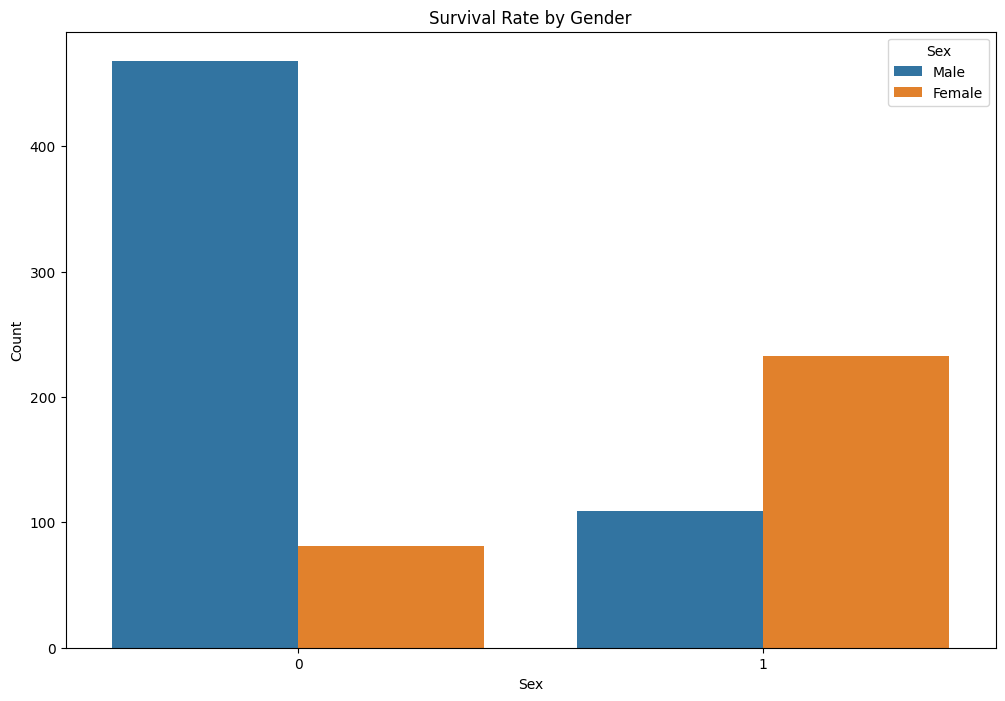

In [277]:
# Let's plot Survived based on Sex column
plt.figure(figsize = (12, 8))

sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title = 'Sex', labels = ['Male', 'Female'])
plt.show()

### 7.1.3 Observations
- We can see that `most Male not survived` and `most Female survived`.

In [278]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
